# Знакомство с VLM

# Знакомимся с API transformers - 5 баллов

В данной задаче мы познакомимся с интерфейсами, которые библиотека transformers предоставляет для работы с VLM. Здесь нужно будет использовать знакомые нам функции `from_pretrained` и `apply_chat_template`, однако добавляется еще и этап препроцессинга изображений и подачи их в модель. Давайте разберемся на примере!

In [1]:
! pip install transformers==4.49.0 peft==0.14.0  accelerate==1.4.0 datasets==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.8/374.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [13]:
! pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 118.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.49.0
    Uninstalling transformers-4.49.0:
      Successfully uninstalled transformers-4.49.0


In [5]:
! pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [ ]:
import torch
from transformers import AutoModelForVision2Seq, AutoProcessor
import os


# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("mps")#else torch.device("cpu")
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_name = "HuggingFaceTB/SmolVLM-256M-Instruct"

# не забудьте загрузить модель в fp16
model = AutoModelForVision2Seq.from_pretrained(pretrained_model_name_or_path=model_name, torch_dtype=torch.half).to(device)
# processor = AutoProcessor.from_pretrained(pretrained_model_name_or_path=model_name, padding_side='left')
processor = AutoProcessor.from_pretrained(pretrained_model_name_or_path=model_name, padding_side='left')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.55M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

In [ ]:
import matplotlib.pyplot as plt

<|im_start|>User:<image>Can you describe this image?<end_of_utterance>
Assistant:


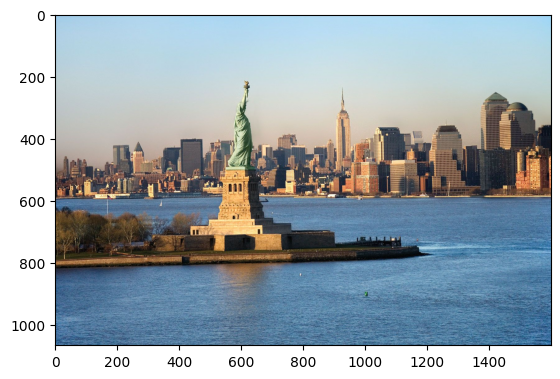

In [ ]:
from transformers.image_utils import load_image

image = load_image("https://cdn.britannica.com/61/93061-050-99147DCE/Statue-of-Liberty-Island-New-York-Bay.jpg")
plt.imshow(image)

messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Can you describe this image?"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(conversation=messages, add_generation_prompt=True)
assert prompt == """<|im_start|>User:<image>Can you describe this image?<end_of_utterance>
Assistant:"""
print(prompt)

Как вы видите, добавляется спецтокен `<image>`, который обозначает, где картинка будет во время инференса относительно текста

In [ ]:
inputs = processor(text=prompt, images=[image], return_tensors="pt")
print(inputs.keys())
print(inputs.input_ids)

dict_keys(['pixel_values', 'pixel_attention_mask', 'input_ids', 'attention_mask'])
tensor([[    1, 11126,    42, 49189, 49153, 49190, 49190, 49190, 49190, 49190,
         49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190,
         49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190,
         49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190,
         49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190,
         49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190,
         49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49189,
         49154, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190,
         49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190,
         49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190,
         49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190, 49190,
         49190, 49190, 49190, 49190, 49190, 4919

В inputs у нас добавляется поле pixel_values - это значения картинки перед входом в ViT (visual transformer), который потом отдаст токены для подстановки в LLM.

Также вы можете видеть, что у нас очень часто встречается токен 49190, которого не было в промпте. Это токен placeholder, на позиции которого будут вставать картиночные эмбеддинги из ViT.

Давайте теперь запустим на этом жадную генерацию 32 токенов (вспомним опции do_sample и max_new_tokens)

In [ ]:
inputs = inputs.to(device)

outputs = model.generate(**inputs, do_sample=False, max_new_tokens=32)
output_text =  processor.decode(outputs[0][inputs.input_ids.shape[1]:])
assert output_text == " The image depicts a large, historic statue of Liberty situated on a small island in a body of water. The statue is a green, cylindrical structure with a human"



NameError: name 'inputs' is not defined

# Multi-Image - 5 баллов

Некоторые модели поддерживают сценарии с несколькими картинками - несколько картинок может быть как в одной фразе, так и в нескольких. Давайте рассмотрим вариант, где мы подаем 2 картинки за раз в один промпт

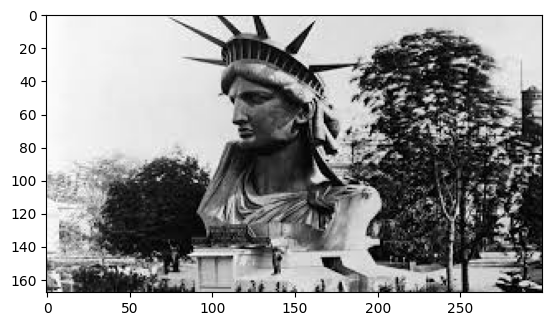

In [ ]:
image2 = load_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTS7w8mlBMZEZAz1ejXqidkvffroe-CSNUgvg&s")
plt.imshow(image2)


In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "What are the differences between the two images?"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(conversation=messages)
inputs = processor(text=prompt, images=[image, image2], return_tensors="pt")
inputs = inputs.to(device)

outputs = model.generate(**inputs, do_sample=False, max_new_tokens=64)
output_text = processor.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)
print(output_text)




1. The first image shows a statue of Liberty while the second image shows a statue of liberty with people around it.


Аналогично можно продолжить историю диалога

In [ ]:
image3 = load_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTay0Qt_Le200R2RcGaVToPsB67ypZ_3Noy5A&s")
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "What are the differences between the two images?"}
        ]
    },
    {
        "role": "assistant",
        "content": [{"type": "text", "text": "they are both statues"}]
    },
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "thank you for the answer! can you tell me what objects were on the first image?"},
        ]
    },

]
prompt = processor.apply_chat_template(conversation=messages)
inputs = processor(text=prompt, images=[image, image2, image3], return_tensors="pt")
inputs = inputs.to(device)

outputs = model.generate(**inputs, do_sample=False, max_new_tokens=64)
output_text = processor.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)
print(output_text)

# ответ немного путает объекты на картинках, но это 260М модель, так что
# для такого размера очень хорошо!



Answer: There is a statue of the Statue of Liberty and a hot dog on the first image.


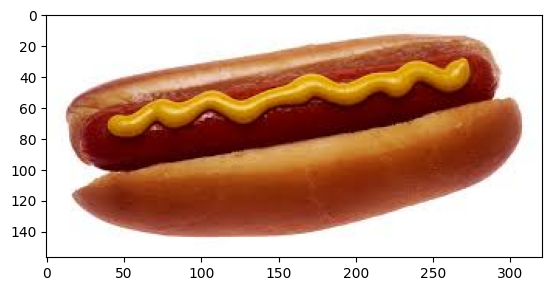

In [ ]:
plt.imshow(image3)

In [ ]:
print(inputs.input_ids.shape)

torch.Size([1, 2366])


Как мы видим из-за 3х картинок размер входа вырос уже до 2000 токенов!

# VLM батчи - 5
Как и в случае с VLM при использовании GPU выгоднее обрабатывать данные батчами.
Обработка данных у каждой модели VLM своя, устоявшегося API как у текстовых моделей нет. Посмотреть примеры работы можно в карточке модели.
Пример для smollm - https://huggingface.co/HuggingFaceTB/SmolVLM-256M-Instruct

Для qwen2.5vl логика другая - https://huggingface.co/Qwen/Qwen2.5-VL-72B-Instruct. Как можно увидеть, там используется вспомогательная функция `process_vision_info` для обработки картинок

У моделей нет одинакового API и не все они загружаются через AutoModelForVision..., так что будьте внимательны!

Аналогично работает и сборка изображений в батч, мы разберем ее на примере smollm:
1. В processor нужно подать список промптов (не забудьте add_generation_prompt!)
2. В качестве images нужно подать плоский список картинок

In [ ]:
messages1 = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "what is on the image"}
        ]
    },
]

messages2 = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "what is on the image"}
        ]
    },
]


batch_of_messages = [messages1, messages2]
batch_of_images = [image2, image3]
prompts = processor.apply_chat_template(batch_of_messages, add_generation_prompt=True)
inputs = processor(text=prompts, images=batch_of_images, return_tensors="pt", padding=True)
inputs = inputs.to(device)

outputs = model.generate(**inputs, do_sample=False, max_new_tokens=64)

output_text1 = processor.decode(outputs[0, inputs.input_ids[0, :].shape[0]:], skip_special_tokens=True)
output_text2 = processor.decode(outputs[1, inputs.input_ids[1, :].shape[0]:], skip_special_tokens=True)

print(output_text1)
print(output_text2)



NameError: name 'image2' is not defined

Как видно из примера - здесь можно подать просто список картинок и он будет раскидан между примерами в батче. В llama3.2 vision нужно подавать список списков каринок, где каждый внутренний список принадлежит конкретному сэмплу из батча. Всегда проверяйте эту логику, логика батчевания зачастую опущена в карточке модели!

# VLM benchmark - 10 баллов
Давайте теперь попробуем сделать замеры нашей модели на бенчмарке mmmu! Вспомним доступные LLM, только в этот раз вам предоставлено больше свободы - можно использовать генерацию ответа вместо скоринга.

In [ ]:
from datasets import load_dataset
dataset = load_dataset("MMMU/MMMU", "Literature")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import ast
import numpy as np
from tqdm.notebook import tqdm

def assemble_messages(data_di, include_correct_answer: bool = False):
    """Compile examples for few shots."""
    q_prefix = "Answer the following question with a single letter A, B, C or D corresponding to the correct answer.\n"

    options  = ast.literal_eval(data_di['options'])
    correct_options = [letter + answ for letter, answ in zip(["A ", "B ", "C ", "D "], options)]
    images = [data_di[f'image_{i}'] for i in range(1, 8) if data_di[f'image_{i}'] is not None] #if dataset['dev'][0][f'image_{i}'] is not None
    answer_tale = "Choices: \n" + " \n".join(correct_options)

    messages = [
            {
                "role": "user",
                "content": [
                    {"type": "image"} for _ in range(len(images))
                ] + [
                    {"type": "text", "text": q_prefix + "Question: \n" + dataset["validation"][0]['question'] + "\n" + answer_tale}
                ]
            },

        ]
    if include_correct_answer:
        messages+=[
            {
                "role": "assistant",
                "content":[{"type": "text", "text": data_di["answer"]}]
            }
        ]
    return messages

def get_images(data_di):
    return [data_di[f'image_{i}'] for i in range(1, 8) if data_di[f'image_{i}'] is not None]



В датасете есть вопрос question, картинка или картинки (image_1..7), варианты ответа options и правильный ответ answer.
Ваша задача прогнать модель на этом датасете, собрать ответы и проверить точность. Можно использовать батчевание, а можно прогонять по одному сэмплу на ваше усмотрение!
В качестве метрики можно репортить accuracy.

In [ ]:
def _model_answer(data: list[dict] = dataset['validation']):
  for data_di in tqdm(data, "Перебираем вопросы"):

    q_prefix = "Answer the following question with a single letter by selecting answer A, B, C or D.\n"

    options  = ast.literal_eval(data_di['options'])
    correct_options = [letter + answ for letter, answ in zip(["A ", "B ", "C ", "D "], options)]
    images = (
        get_images(data_di=dataset['dev'][0]) +
        # get_images(data_di=dataset['dev'][1]) +
        # get_images(data_di=dataset['dev'][2]) +
        get_images(data_di=data_di)) #if dataset['dev'][0][f'image_{i}'] is not None
    answer_tale = "Options: \n" + " \n".join(correct_options)

    messages = (
            assemble_messages(data_di=dataset['dev'][0], include_correct_answer=True) +
            # assemble_messages(data_di=dataset['dev'][1], include_correct_answer=True) +
            # assemble_messages(data_di=dataset['dev'][2], include_correct_answer=True) +
            assemble_messages(data_di=data_di)
        )

    prompt = processor.apply_chat_template(conversation=messages, add_generation_prompt=True)

    inputs = processor(text=prompt, images=images, return_tensors="pt", padding=True)
    inputs = inputs.to(device)

    outputs = model.generate(**inputs, do_sample=False, max_new_tokens=3)
    torch.cuda.empty_cache()

    yield processor.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)[-1], data_di["answer"]

In [ ]:
model_answers = list(_model_answer())

Перебираем вопросы:   0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
answer_ar = np.array(model_answers)
print("Точность:", (answer_ar[:, 0] == answer_ar[:, 1]).sum()/answer_ar.shape[0])

Точность: 0.36666666666666664


# Обучение VLM - 25 баллов
Давайте попробуем обучить pretrain-VLM на какой-нибудь простой задаче. Это не instruct модель, так что она не способна отвечать на произвольный вопрос по картинке

In [1]:
import os
import torch
from datasets import load_dataset
from transformers import AutoModelForVision2Seq, AutoProcessor

from peft import LoraConfig, get_peft_model
from transformers.image_utils import load_image

device = torch.device("cuda")
# device = torch.device("cpu")
model_name = "HuggingFaceTB/SmolVLM-Base"
model = AutoModelForVision2Seq.from_pretrained(model_name, torch_dtype=torch.bfloat16).eval().to(device)
processor = AutoProcessor.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Эта модель обучена просто на документах с картинками, поэтому она будет игнорировать вопросы и продолжать текст как из статей

In [2]:
messages1 = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "the image depicts"}
        ]
    },
]

messages2 = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "how many objects are on the image?"}
        ]
    },
]

image = load_image("https://cdn.britannica.com/61/93061-050-99147DCE/Statue-of-Liberty-Island-New-York-Bay.jpg")

image3 = load_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTay0Qt_Le200R2RcGaVToPsB67ypZ_3Noy5A&s")

batch_of_messages = [messages1, messages2]
batch_of_images = [image, image3]
prompts = processor.apply_chat_template(batch_of_messages, add_generation_prompt=True)
inputs = processor(text=prompts, images=batch_of_images, return_tensors="pt", padding=True)
inputs = inputs.to(device)

outputs = model.generate(**inputs, do_sample=False, max_new_tokens=64)

output_text1 = processor.decode(outputs[0, inputs.input_ids[0, :].shape[0]:], skip_special_tokens=True)
output_text2 = processor.decode(outputs[1, inputs.input_ids[1, :].shape[0]:], skip_special_tokens=True)

print(output_text1)
print(output_text2)


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


 <image> <image> <image> <image> <image> <image> <image> <
<image> <image> <image> <image> <image> <image> <image>


Загрузим датасет vqav2-small - visual question answering, попробуем обучить на нем нашу модель в SFT

In [3]:
dataset = load_dataset('merve/vqav2-small')#, trust_remote_code=True)
split_ds = dataset["validation"].train_test_split(test_size=0.5, seed=5)
train_ds = split_ds["train"]

Question: What is to the right of the bananas?
Answer: cell phone


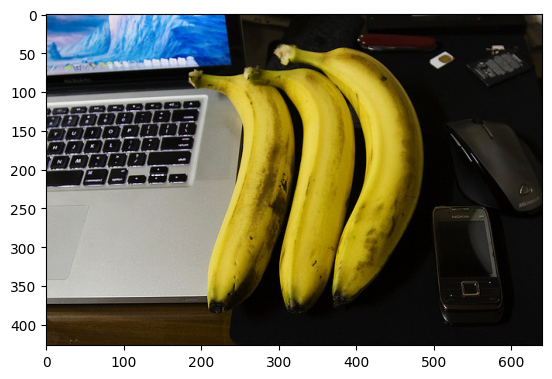

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_ds[0]["image"])
print("Question:", train_ds[0]["question"])
print("Answer:", train_ds[0]["multiple_choice_answer"])

Собираем Lora-модель, в качестве ранга, чтобы все влезло в colab рекомендую взять ранг 4

In [5]:
lora_rank = 4
lora_config = LoraConfig(
    r=lora_rank,
    lora_alpha=64,
    lora_dropout=0.1,
    target_modules=['down_proj','o_proj','k_proj','q_proj','gate_proj','up_proj','v_proj'],
)
model.add_adapter(lora_config) #, peft_config = lora_config, adapter_name='bla', adapter_config= adapter_name='bla'
model.enable_adapters()

model = get_peft_model(model, lora_config)
if lora_rank == 4:
  assert model.get_nb_trainable_parameters()[0] == 5268480


/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [6]:
model.print_trainable_parameters()

trainable params: 5,268,480 || all params: 2,251,541,360 || trainable%: 0.2340


Функция transform_example_to_prompt должна делать следующее:
1. Брать пример из датасета, собирать его в messages вида \[Юзер: картинка + вопрос, Ассистент: ответ]
2. Превращать эти messages в полный промпт, который содержит вопрос, картинку и ответ
3. Брать только первое сообщение из messages и превращать его в промпт без ответа (но с generation_prompt!). Будем называть его prefix_prompt
4. Считать длину prefix_prompt в токенах с учетом подстановки изображения. Это понадобится нам для маскирования префикса, т.к. функцию потерь мы хотим считать только по ответу
5. Возвращаем: полный промпт (строку), картинку и длину префикса

In [7]:
from typing import Tuple

def transform_example_to_prompt(example) -> Tuple[str, "Image", int]:
    """
    example
    {'multiple_choice_answer': 'cell phone',
    'question': 'What is to the right of the bananas?',
    'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x427 at 0x7EFEC8FBE6C0>
    }
    """
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": example["question"]}
            ]
        },
        {
            "role": "assistant",
            "content": [
                {"type": "text", "text": example["multiple_choice_answer"]}
            ]
        }
    ]

    full_prompt = processor.apply_chat_template(conversation=messages, add_generation_prompt=False)
    prefix_prompt = processor.apply_chat_template(conversation=[messages[0]], add_generation_prompt=True)
    prefix_prompt_encoded = processor(text=prefix_prompt, images=example["image"], return_tensors="pt")["input_ids"]

    return full_prompt, example["image"], prefix_prompt_encoded.shape[1]

full_prompt, image, prefix_len = transform_example_to_prompt(train_ds[0])
assert full_prompt == "<|im_start|>User:<image>What is to the right of the bananas?<|endoftext|>\nAssistant: cell phone<|endoftext|>\n"
assert prefix_len == 1200

collate_fn - функция сборки батча (она очень похожа на то, как мы собирали батчи для инференса)
1. Проходимся по всем примерам, к каждому примеру применяем transform_example_to_prompt, запоминаем полученные значения в массивы prompts_batch, images_batch, prefix_lengths
2. Собираем входы, применяем processor к prompts_batch и images_batch
3. Начинаем заполнять labels. В labels значение -100 должно стоять на позициях, соответствующих: паддингам (processor.tokenizer.pad_token_id), картиночным токенам (model.image_token_id), а также всем токенам префикса (токенам от 0 до prefix_lengths[i])

In [8]:
from typing import List, Dict
def collate_fn(examples: List[Dict]):

  prompts_batch, images_batch, prefix_lengths = [], [], []
  for example in examples:
      full_prompt, image, prefix_len = transform_example_to_prompt(example)
      prompts_batch.append(full_prompt)
      images_batch.append(image)
      prefix_lengths.append(prefix_len)
  inputs = processor(text=prompts_batch, images=images_batch, return_tensors="pt", padding=True)

  labels = inputs["input_ids"].detach().clone()
  labels[labels == model.image_token_id] = -100
  labels[labels == processor.tokenizer.pad_token_id] = -100

  tmp = []
  for pref_len, label in zip(prefix_lengths, labels):
    label[:pref_len] = -100
    tmp.append(label)

  batch = inputs
  batch["labels"] = torch.vstack(tmp).long()#.to(device)
  return batch

batch = collate_fn([train_ds[0], train_ds[1]])
labels = batch["labels"]

tokens_to_predict_0 = processor.tokenizer.decode(labels[0][labels[0] != -100].tolist())
tokens_to_predict_1 = processor.tokenizer.decode(labels[1][labels[1] != -100].tolist())

assert tokens_to_predict_0 == " cell phone<|endoftext|>\n"
assert tokens_to_predict_1 == " sweats<|endoftext|>\n"

In [11]:
batch["labels"]

tensor([[-100, -100, -100,  ..., 5460,    0,  198],
        [-100, -100, -100,  ...,    0,  198, -100]])

In [12]:
batch["input_ids"]

tensor([[    1, 11126,    42,  ...,  5460,     0,   198],
        [    1, 11126,    42,  ...,     0,   198,     2]])

Запускаем обучение, не забудьте передать:
* learning_rate (лучше 1e-4)
* эпохи обучения (я брал 1)
* gradient_checkpointing
* gradient_accumulation (4, тогда датасет на 100 сэмплов обучение будет идти 25 шагов и нам этого хватит, чтобы увидеть первые результаты)

В сетапе на коллабе я рекомендую взять датасет из 100 сэмплов.
Обучение начнется с лоссов 5.2-5.6 и постепенно будет падать (иногда могут быть скачки вверх от батча к батчу, не пугайтесь). На колабе обучение занимает около 35 минут, на H100 около 14 секунд.

Референсные лоссы для этого сетапа:
```
Step Training Loss
1 5.280100
2 5.615200
3 4.710200
4 5.496900
5 5.958500
6 6.190700
7 4.340700
8 3.609100
9 4.489100
10 4.231200
11 4.689200
12 3.090200
13 3.324200
14 3.528100
15 3.771900
16 3.551000
17 3.027500
18 3.236000
19 3.044200
20 3.597200
21 3.398800
22 3.663900
23 2.797600
24 3.266600
25 3.030400
```

In [13]:
torch.cuda.empty_cache()

In [9]:
from transformers import TrainingArguments, Trainer


training_args = TrainingArguments(
    num_train_epochs=1,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=4,
    learning_rate=1.5e-5,
    weight_decay=0.01,
    logging_steps=1,
    save_strategy="steps",
    save_steps=25,
    save_total_limit=1,
    optim="adamw_torch",
    bf16=True,
    output_dir=f"./{model_name}-vqav2",
    report_to="none",
    remove_unused_columns=False,
    gradient_checkpointing=True,
    label_names=["labels"],

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=[train_ds[i] for i in range(100)],
    processing_class=processor,
    data_collator=collate_fn

)

trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
1,5.285200
2,5.496100
3,4.414700
4,5.336600
5,4.562500
6,5.337300
7,3.408900
8,2.917000
9,3.793600
10,3.256300


Step,Training Loss
1,5.285200
2,5.496100
3,4.414700
4,5.336600
5,4.562500
6,5.337300
7,3.408900
8,2.917000
9,3.793600
10,3.256300


KeyboardInterrupt: 

Сохраним lora в модель и сохраним модель локально, чтобы ее снова загрузить (без этого на текущей ревизии у меня все падало)

In [ ]:
model.merge_and_unload()
model.save_pretrained("llocal")

In [ ]:
model = AutoModelForVision2Seq.from_pretrained("llocal", torch_dtype=torch.bfloat16).eval().to(device)


Теперь давайте убедимся, что ответы на вопросы стали разумными

In [19]:
processor = AutoProcessor.from_pretrained(pretrained_model_name_or_path=model_name, padding_side='right')

In [10]:
messages1 = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Which country has this?"}
        ]
    },
]

messages2 = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "is this food?"}
        ]
    },
]

image = load_image("https://cdn.britannica.com/61/93061-050-99147DCE/Statue-of-Liberty-Island-New-York-Bay.jpg")

image3 = load_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTay0Qt_Le200R2RcGaVToPsB67ypZ_3Noy5A&s")


batch_of_messages = [messages1, messages2]
batch_of_images = [image, image3]
prompts = processor.apply_chat_template(batch_of_messages, add_generation_prompt=True)
inputs = processor(text=prompts, images=batch_of_images, return_tensors="pt", padding=True)
inputs = inputs.to(device)

outputs = model.generate(**inputs, do_sample=False, max_new_tokens=64)

output_text1 = processor.decode(outputs[0, inputs.input_ids[0, :].shape[0]:], skip_special_tokens=True)
output_text2 = processor.decode(outputs[1, inputs.input_ids[1, :].shape[0]:], skip_special_tokens=True)

print(output_text1)
print(output_text2)




A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


RuntimeError: shape mismatch: value tensor of shape [1782, 2048] cannot be broadcast to indexing result of shape [0, 2048]

In [21]:
output_text1

' <image> <image> <image> <image> <image> <image> <image> <'

In [23]:
inputs.input_ids.shape

torch.Size([2, 1196])

In [28]:
processor.decode(outputs[0, 1196:])

' <image> <image> <image> <image> <image> <image> <image> <'